In [93]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

data = pd.read_csv("letter-recognition.csv")
data.columns = ['letter', 
                'xbox'  , 
                'ybox'  , 
                'width' , 
                'height', 
                'onpix' , 
                'xbar'  ,
                'ybar'  , 
                'x2bar' , 
                'y2bar' , 
                'xybar' , 
                'x2ybar', 
                'xy2bar', 
                'xedge' ,
                'xedgey', 
                'yedge' , 
                'yedgex']
order = list(np.sort(data['letter'].unique()))
random_state = 100

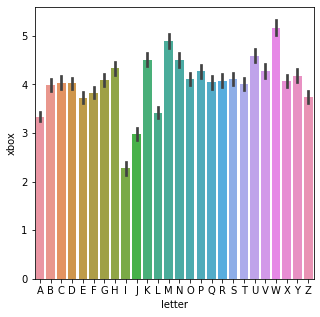

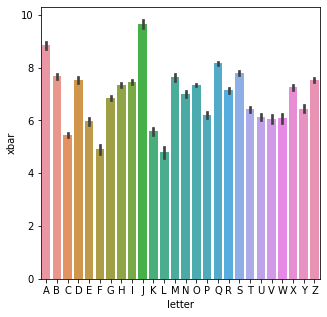

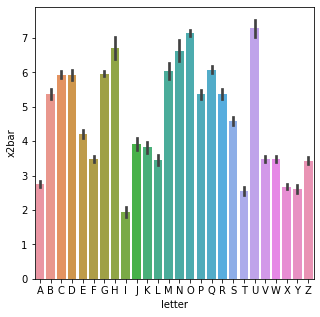

In [94]:
plt.figure(figsize=(5, 5))
sns.barplot(x='letter',
            y='xbox', 
            data=data, 
            order=order)

plt.figure(figsize=(5, 5))
sns.barplot(x='letter', 
            y='xbar', 
            data=data, 
            order=order)

plt.figure(figsize=(5, 5))
sns.barplot(x='letter', 
            y='x2bar', 
            data=data, 
            order=order)

In [95]:
attribute_mean = data.groupby('letter').mean()
attribute_mean

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
letter,,,,,,,,,,,,,,,,
A,3.337136,6.975919,5.128010,5.178707,2.991128,8.851711,3.631179,2.755387,2.043093,7.802281,2.338403,8.465146,2.771863,6.321926,2.875792,7.468948
B,3.985640,6.962141,5.088773,5.169713,4.596606,7.671018,7.062663,5.366841,5.571802,7.954308,5.506527,6.652742,3.117493,7.919060,6.612272,9.100522
C,4.031250,7.063859,4.701087,5.296196,2.775815,5.437500,7.627717,5.927989,7.177989,8.773098,7.494565,11.947011,1.991848,8.876359,4.080163,8.555707
D,4.023602,7.244720,5.170186,5.288199,4.026087,7.539130,6.806211,5.921739,6.508075,8.166460,5.111801,5.750311,3.365217,7.813665,3.971429,7.628571
E,3.727865,6.944010,4.756510,5.201823,3.679688,5.966146,7.352865,4.223958,7.585938,8.507812,6.242188,10.341146,2.127604,8.298177,6.022135,8.506510
F,3.832258,7.009032,4.898065,5.209032,3.178065,4.913548,10.454194,3.476129,4.886452,11.242581,7.830968,5.723871,1.736774,9.117419,3.321290,6.712258
G,4.086675,6.988357,4.988357,5.282018,3.566624,6.866753,6.586028,5.966365,5.337646,7.429495,6.157827,9.586028,2.833118,8.369987,5.146184,9.216041
H,4.331063,6.844687,5.784741,5.193460,4.253406,7.344687,7.320163,6.702997,4.280654,8.044959,5.899183,7.801090,3.862398,8.047684,3.095368,7.858311
I,2.270199,6.980132,2.631788,5.209272,1.825166,7.458278,7.035762,1.940397,5.973510,9.476821,5.797351,7.649007,0.537748,8.066225,2.141722,7.931126


In [96]:
round(data.drop('letter', axis=1).mean(), 2)

xbox      4.02
ybox      7.04
width     5.12
height    5.37
onpix     3.51
xbar      6.90
ybar      7.50
x2bar     4.63
y2bar     5.18
xybar     8.28
x2ybar    6.45
xy2bar    7.93
xedge     3.05
xedgey    8.34
yedge     3.69
yedgex    7.80
dtype: float64

In [97]:
X = data.drop("letter", axis = 1)
Y = data['letter']

X_scaled = scale(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.3, random_state = random_state)

In [98]:
"""
Code for Markov Chain Monte Carlo and Gibs sampling by Bruce Walsh
"""

import numpy as np
import numpy.linalg as npla

def gaussian(x, sigma, sampled=None):
    if sampled is None: 
        L = npla.cholesky(sigma)
        z = np.random.randn(x.shape[0], 1)
        return np.dot(L, z+x)
    else:
        return np.exp(-0.5*np.dot( (x-sampled).T, np.dot(npla.inv(sigma), (x-sampled))))[0,0]


def gaussian_1d(x, sigma, sampled=None):
    if sampled is None:
        return sigma*np.random.randn(1)[0]
    else:
        return np.exp(-0.5( (x-sampled)**2)/sigma**2)


def chi_sq(x, sampled = None, n = 0):
    if sampled is None:
        return np.random.chisquare(n)
    else:
        return np.power(sampled,0.5*n - 1)*np.exp(-0.5*sampled)


def inv_chi_sq(theta, n, a):
    return np.power(theta, -0.5*n)*np.exp(-a/(2*theta))


def metropolis(f, proposal, old):
    new = proposal(old)
    alpha = np.min([f(new)/f(old), 1])
    u = np.random.uniform()
    cnt = 0
    if (u < alpha):
        old = new
        cnt = 1
    return old, cnt


def met_hast(f, proposal, old):
    new = proposal(old)
    alpha = np.min([(f(new)*proposal(new, sampled = old))/(f(old) * proposal(old, sampled = new)), 1])
    u = np.random.uniform()
    cnt = 0
    if (u < alpha):
        old = new
        cnt = 1
    return old, cnt

def run_chain(chainer, f, proposal, start, n, take=1):
    count = 0
    samples = [start]
    for i in range(n):
        start, c = chainer(f, proposal, start)
        count = count + c
        if i%take is 0:
            samples.append(start)
    return samples, count

def uni_prop(x, frm, to, sampled=None):
    return np.random.uniform(frm, to)


from functools import partial
import pylab

## Model Building

Let's fist build two basic models - linear and non-linear with default hyperparameters, and compare the accuracies.

In [99]:
import random
print(type(X_train))
print((y_train.to_numpy()))

<class 'numpy.ndarray'>
['D' 'I' 'W' ... 'Q' 'V' 'Y']


In [100]:
def markov_samp(X_train, Y_train, k = 5, q = 1.2):

    Init_sampl = np.concatenate((np.vstack(X_train), np.vstack(Y_train.to_numpy())), axis = 1)
    Dtr = random.sample(list(Init_sampl), 2000)

    m = len(Dtr)
    print("M : " , m)
    mneg = 0
    mplus = 0

    index = np.random.choice(len(Dtr), 1, replace=False)  
    Dtra = np.array(Dtr)
    print(type(Dtra))
    zt = Dtra[index][0]

    print("zt : ", zt)
    if m%2 == 0:
        if zt[16] == 'A':
            mplus += 1;
        else:
            mneg += 1
    samp = []

    Pd = 0
    Pdd = 0
    print(zt)
    while(mplus + mneg < m ):
        zstar = Dtra[np.random.choice(len(Dtr), 1, replace=False)][0]
        P = 1
        yt = zt[16]
        zt = zstar
        if P == 1:
            if zt[16] == yt:
                samp.append(zstar) 
            else:
                samp.append(zstar) 

        if len(samp) == k:
            Pdd = q*P
            samp.append(zstar)
            
        ztp1 = zstar
        if yt == 'A':
            mplus += 1
        else:
            mneg += 1

        if P > 1 or Pd > 1 or Pdd > 1:
            samp.append(zstar)
    return samp


In [101]:
nsamp = np.array(markov_samp(X_train, y_train))
print(nsamp.shape)
X_train = nsamp[:, 0:16]
y_train = nsamp[:, 16]
print(X_train.shape)
print(y_train.shape)

M :  2000
<class 'numpy.ndarray'>
zt :  ['-1.057754324490914' '-1.8264075112055944' '-1.549729028306758'
 '-1.491326248237078' '-1.1440792055116078' '-0.9365872455317732'
 '1.075180341976108' '-0.2329204204284823' '-0.49504414912515493'
 '0.2884702515392135' '0.2075969412352232' '-1.8883786760537289'
 '-0.8773006344730662' '1.0739710053820337' '-0.26955622335145096'
 '-0.4953355154320848' 'P']
['-1.057754324490914' '-1.8264075112055944' '-1.549729028306758'
 '-1.491326248237078' '-1.1440792055116078' '-0.9365872455317732'
 '1.075180341976108' '-0.2329204204284823' '-0.49504414912515493'
 '0.2884702515392135' '0.2075969412352232' '-1.8883786760537289'
 '-0.8773006344730662' '1.0739710053820337' '-0.26955622335145096'
 '-0.4953355154320848' 'P']
(3995, 17)
(3995, 16)
(3995,)


In [102]:
Y_train = []
for i in y_train:
    Y_train.append(ord(i))

print(X_test.shape)

(6000, 16)


In [103]:
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, Y_train)

y_pred = model_linear.predict(X_test)

Y_test = []
for i in y_test:
    Y_test.append(ord(i))

In [104]:
acc = metrics.accuracy_score(y_true=Y_test, y_pred=y_pred)
print("Accuracy:")
print(acc)
print()

Accuracy:
0.7843333333333333



In [105]:
non_linear_model = SVC(kernel='rbf')
non_linear_model.fit(X_train, Y_train)
y_pred = non_linear_model.predict(X_test)

In [106]:
acc = metrics.accuracy_score(y_true=Y_test, y_pred=y_pred)
print("Accuracy:")
print(acc)
print()

Accuracy:
0.8256666666666667



In [107]:
non_linear_model = SVC(kernel='poly')
non_linear_model.fit(X_train, Y_train)
y_pred = non_linear_model.predict(X_test)

In [108]:
acc = metrics.accuracy_score(y_true=Y_test, y_pred=y_pred)
print("Accuracy:")
print(acc)
print()

Accuracy:
0.7096666666666667



In [109]:
folds = KFold(n_splits = 5, shuffle = True, random_state = random_state)
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]

model = SVC(kernel="rbf")

model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

model_cv.fit(X_train, y_train)                  


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.3min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [110]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.459047,0.004918,0.186256,0.004017,1,0.01,"{'C': 1, 'gamma': 0.01}",0.788486,0.812265,0.775970,0.819775,0.798498,0.798999,0.015803,7,0.831665,0.835732,0.831039,0.821339,0.833542,0.830663,0.004941
1,0.891030,0.004362,0.208482,0.001515,1,0.001,"{'C': 1, 'gamma': 0.001}",0.449312,0.473091,0.498123,0.493116,0.486859,0.480100,0.017533,11,0.495620,0.489049,0.506884,0.514393,0.493116,0.499812,0.009390
2,1.099182,0.003698,0.210728,0.002668,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.052566,0.058824,0.046308,0.043805,0.053817,0.051064,0.005392,12,0.048185,0.046621,0.049750,0.050375,0.054756,0.049937,0.002739
3,0.273501,0.001323,0.129159,0.002650,10,0.01,"{'C': 10, 'gamma': 0.01}",0.917397,0.936170,0.921151,0.933667,0.921151,0.925907,0.007526,4,0.952753,0.949937,0.953066,0.951815,0.952441,0.952003,0.001112
4,0.447396,0.007538,0.183955,0.003061,10,0.001,"{'C': 10, 'gamma': 0.001}",0.774718,0.793492,0.764706,0.798498,0.799750,0.786233,0.014013,8,0.805695,0.816646,0.815081,0.804130,0.821339,0.812578,0.006608
5,0.879625,0.002615,0.210830,0.003903,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.451815,0.486859,0.500626,0.499374,0.489362,0.485607,0.017735,10,0.495932,0.496245,0.510638,0.517835,0.494994,0.503129,0.009360
6,0.245927,0.003854,0.092713,0.002623,100,0.01,"{'C': 100, 'gamma': 0.01}",0.982478,0.983730,0.977472,0.977472,0.972466,0.978723,0.004036,2,0.994994,0.995307,0.995620,0.995620,0.994994,0.995307,0.000280
7,0.295370,0.001556,0.137499,0.001044,100,0.001,"{'C': 100, 'gamma': 0.001}",0.883605,0.909887,0.879850,0.912390,0.898623,0.896871,0.013259,5,0.922403,0.920213,0.924593,0.922716,0.928661,0.923717,0.002836
8,0.452290,0.003950,0.183401,0.001663,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.765957,0.789737,0.765957,0.802253,0.794743,0.783730,0.015048,9,0.801001,0.813830,0.814768,0.798185,0.817584,0.809074,0.007889
9,0.245762,0.002253,0.091336,0.001587,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.984981,0.989987,0.982478,0.984981,0.982478,0.984981,0.002742,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


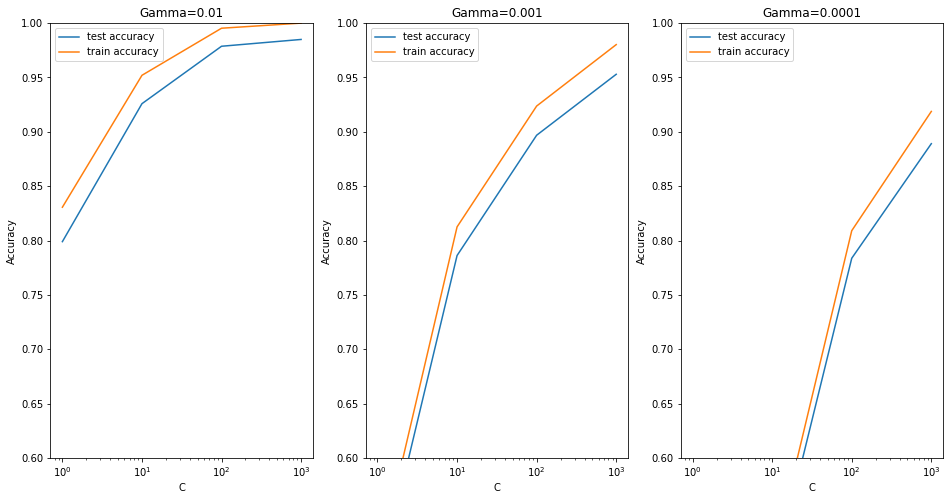

In [111]:
cv_results['param_C'] = cv_results['param_C'].astype('int')
plt.figure(figsize=(16,8))

plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [112]:
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("Best score :", best_score)
print("Best Hyperparameters:", best_hyperparams)

Best score : 0.9849812265331664
Best Hyperparameters: {'C': 1000, 'gamma': 0.01}


In [113]:
model = SVC(C=1000, gamma=0.01, kernel="rbf")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:")
print(acc)
print()

Accuracy:
0.8268333333333333

